In [1]:
%matplotlib notebook
import sys
# sys.path.append('e:\\dp\\pythonScirpts\\PyQCat30')
sys.path.append('e:\\dp\\pythonscripts\\autoflow')
from measureflow import *
from measureflow.SingleQubit import *
import numpy as np
import copy
import pickle
import matplotlib.pyplot as plt
import qutip as qp
import time
# from measureflow.tool.correctQ0 import C1

connecting mongoDB......
connected successfully......


In [2]:
vol = []
print(vol)

[]


# 单个bus并行时，读取频率和中频设置

In [3]:
# Bus 7 Q37-Q42
fr_list = [7053, 7131, 7231, 7096, 7179, 7271]
R_output_freq = int(np.mean(fr_list))
R_IF = 1050
ProbePower=-25
SamplingWidth = 800
IF_list = [fr - R_output_freq + R_IF for fr in fr_list]
Amp_list = [1 for fr in fr_list]
Width_list = [2500 for fr in fr_list]
print(f'output_freq:{R_output_freq},intermediate_frequency:{R_IF},baseIF:{IF_list}')

output_freq:7160,intermediate_frequency:1050,baseIF:[943, 1021, 1121, 986, 1069, 1161]


In [4]:
# Bus 8 Q43-48
fr_list = [7179.5, 7280.5, 7046, 7145, 7235.5, 7092]
R_output_freq = int(np.mean(fr_list))
R_IF = 1050
ProbePower=-25
SamplingWidth = 800
IF_list = [fr - R_output_freq + R_IF for fr in fr_list]
Amp_list = [1 for fr in fr_list]
Width_list = [2500 for fr in fr_list]
print(f'output_freq:{R_output_freq},intermediate_frequency:{R_IF},baseIF:{IF_list}')

output_freq:7163,intermediate_frequency:1050,baseIF:[1066.5, 1167.5, 933, 1032, 1122.5, 979]


In [5]:
# Bus 9 Q49-54
fr_list = [7243, 7089, 7191, 7252.5, 7056.5, 7143.5]
R_output_freq = int(np.mean(fr_list))
R_IF = 1050
ProbePower=-25
SamplingWidth = 800
IF_list = [fr - R_output_freq + R_IF for fr in fr_list]
Amp_list = [1 for fr in fr_list]
Width_list = [2500 for fr in fr_list]
print(f'output_freq:{R_output_freq},intermediate_frequency:{R_IF},baseIF:{IF_list}')

output_freq:7162,intermediate_frequency:1050,baseIF:[1131, 977, 1079, 1140.5, 944.5, 1031.5]


In [ ]:
# Bus 10 Q55-60
fr_list = [7000, 7149, 7238, 7117.5, 7196, 7289.5]
R_output_freq = int(np.mean(fr_list))
R_IF = 1050
ProbePower=-25
SamplingWidth = 800
IF_list = [fr - R_output_freq + R_IF for fr in fr_list]
Amp_list = [1 for fr in fr_list]
Width_list = [2500 for fr in fr_list]
print(f'output_freq:{R_output_freq},intermediate_frequency:{R_IF},baseIF:{IF_list}')

In [ ]:
# Bus 11 Q64-66
fr_list = [ 7247, 7098]
# fr_list = [7041.5, 7247, 7098]
R_output_freq = int(np.mean(fr_list))
R_IF = 1050
ProbePower=-25
SamplingWidth = 800
IF_list = [fr - R_output_freq + R_IF for fr in fr_list]
Amp_list = [1 for fr in fr_list]
Width_list = [2500 for fr in fr_list]
print(f'output_freq:{R_output_freq},intermediate_frequency:{R_IF},baseIF:{IF_list}')

# 两个bus（共本振） 并行测试时读取频率和中频设置

In [6]:
fr_list1 = [7053, 7131, 7231, 7096, 7179, 7271]
fr_list2 = [7243, 7089, 7191, 7252.5, 7056.5, 7143.5]
fr_list = fr_list1 + fr_list2
R_output_freq = int(np.mean(fr_list))
R_IF = 1050
ProbePower=-20
SamplingWidth = 1000
IF_list = [fr - R_output_freq + R_IF for fr in fr_list]
Amp_list = [1 for fr in fr_list]
Width_list = [2500 for fr in fr_list]
readout_digital_channel_list = list(range(1,13,1))
print(f'output_freq:{R_output_freq},intermediate_frequency:{R_IF},baseIF:{IF_list}')

output_freq:7161,intermediate_frequency:1050,baseIF:[942, 1020, 1120, 985, 1068, 1160, 1132, 978, 1080, 1141.5, 945.5, 1032.5]


# 多个bus时，共本振的通道作为一组设置；每一个本振一组设置

# 初始化一个比特和所有待测读取通道

In [7]:
# 
XY_delay = 45.3125 # 30.3125
Z_delay = 0
probe_delay = max([XY_delay, Z_delay])

m = 37
period = 100
RDs = []
for index in range(len(fr_list)):
    readout_digital_channel = readout_digital_channel_list[index]
    RWG = ReadoutWaveGenerator(IF_list=[IF_list[index]], Amp_list=[Amp_list[index]], Width_list=[Width_list[index]])
    RD = ReadoutControler( RWG,
                           serial_number=readout_digital_channel, ### 注意这里的通道编号配置，根据需要设置好对应的读取通道
                           vol=vol,
                           ProbeFreq=R_output_freq,
                           ProbePower=ProbePower,
                           SamplingWidth=SamplingWidth,
                           ProbeDelay= 50 + probe_delay,
                           SamplingDelay=800,
                           PowerAtt=30,
                           repeat = 1000,
                           period = period,
                           intermediate_frequency=R_IF,
    #                        data_flag='P0-P1',
                           data_flag='amp-phase'
                         )
    RDs.append(RD)

IF = 1050
f10 = 4560
WG = WaveGenerator(Ax1=0.68751, Width=300, w1=2.5,IF=IF,delta=-210,
                   Ax2=0.34, alpha=1)
WG.Az1 = 0
WG.detune1 = -0
WG.detune2 = -0
WG.Vz = False
XY_power = -20
WG.rz = None
WG.sz = None
z_dc = 0         # z_dc 就是monster里的awg_bias
XY_freq = f10


Q = QubitControler(WG,
                   serial_number=m,
                   vol=0,
                   XY_freq= XY_freq,
                   XY_power= XY_power,
                   XY_delay= XY_delay,
                   Z_delay= Z_delay,
                   intermediate_frequency=IF,
                   Zcorrect=0,#True,
                   Zcompensate=0,
                   period =period,
                   z_dc=z_dc)
# Q.Z.correct_list = [C1]
Q.XY.channel = 1
Q.XY.output = False
Q.Z.channel = 1      # 注意bias测调制时，需要用到Z通道，但是不需要Z通道波形输出，所以可以关闭输出
Q.Z.output = False

add_qubits = []

# 利用copy方法配置其他比特，只需要设置好Z通道和比特编号 ，根据需要可以使用for语句设置

In [8]:
Q1_copy = copy.deepcopy(Q)
q_name = list(range(38,43,1)) + list(range(49,55,1))
z_channel_list = list(range(3, 12,2)) + list(range(35,46,2))
print(f"qubit_name:{q_name},\n z_channel:{z_channel_list}")
Qubits = [Q]
for q_name,z_channel in zip(q_name, z_channel_list):
    qubit = copy.deepcopy(Q1_copy)
    qubit.Z.channel = z_channel
    qubit.serial_number = str(q_name)
    Qubits.append(qubit)

qubit_name:[38, 39, 40, 41, 42, 49, 50, 51, 52, 53, 54],
 z_channel:[3, 5, 7, 9, 11, 35, 37, 39, 41, 43, 45]


# 开始实验

In [9]:
from measureflow.MultiQubits.cavity_mq import *

In [10]:
Sc = Cavity(Qubits, RDs)

{'fc': 7161, 'vol': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'flag': False, 'power': -25, 'z_dc0': 0, 'z_dc1': 0, 'z_dc2': 0, 'z_dc3': 0, 'z_dc4': 0, 'z_dc5': 0, 'z_dc6': 0, 'z_dc7': 0, 'z_dc8': 0, 'z_dc9': 0, 'z_dc10': 0, 'z_dc11': 0}


<IPython.core.display.Javascript object>


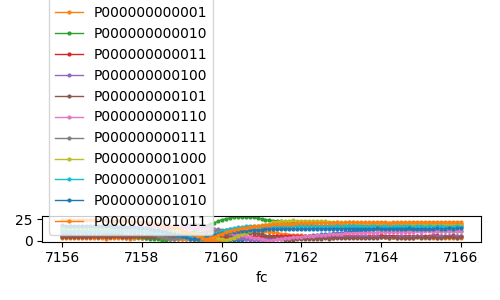

fc=7163.400000:  26%|████████████████▋                                                | 26/101 [00:10<00:22,  3.37it/s]e:\dp\pythonscripts\autoflow\measureflow\tool\PlotTool.py:300: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()
fc=7156.000000: 100%|████████████████████████████████████████████████████████████████| 101/101 [00:32<00:00,  3.15it/s]
e:\dp\pythonscripts\autoflow\measureflow\MultiQubits\cavity_mq.py:129: RuntimeWarning: invalid value encountered in sqrt
  Plotlines(fc_list_qubit, 'freq [MHz]', [amp_list, np.sqrt(F2.y2)], 'amp', ['raw', 'fit'], title1,


<IPython.core.display.Javascript object>


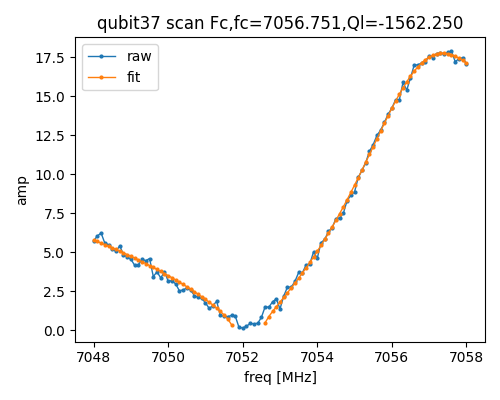

<IPython.core.display.Javascript object>


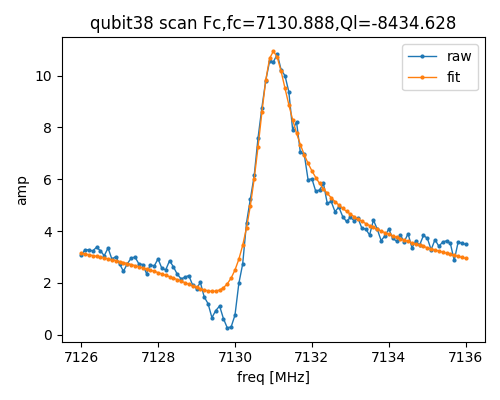

<IPython.core.display.Javascript object>


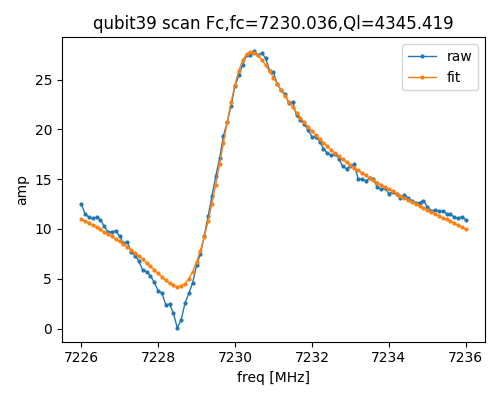

<IPython.core.display.Javascript object>


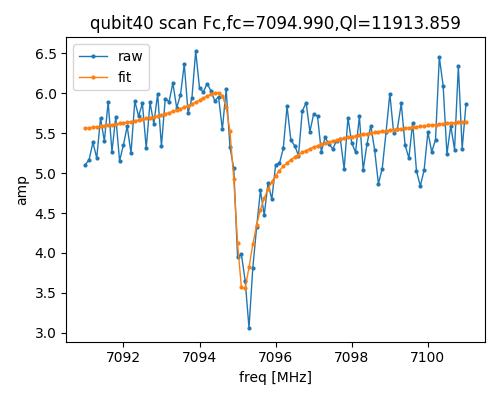

<IPython.core.display.Javascript object>


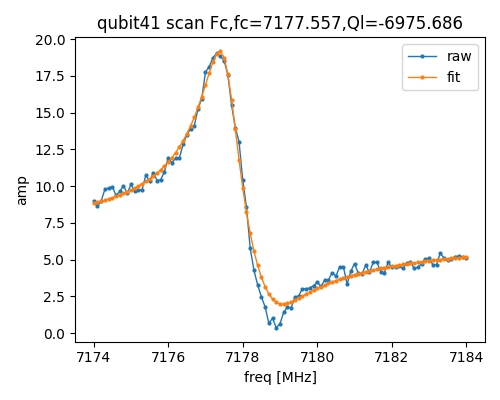

<IPython.core.display.Javascript object>


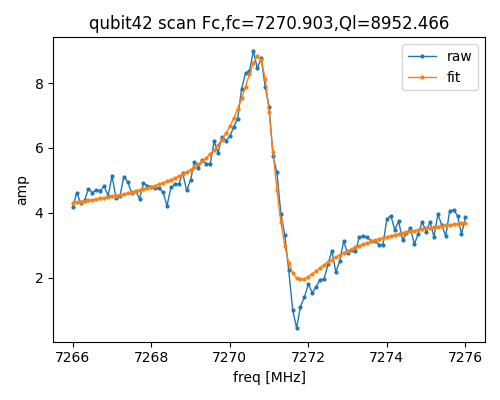

<IPython.core.display.Javascript object>


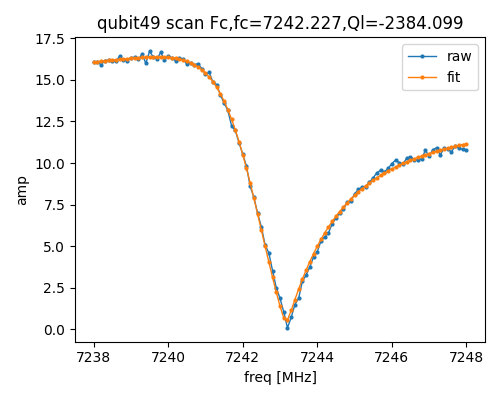

<IPython.core.display.Javascript object>


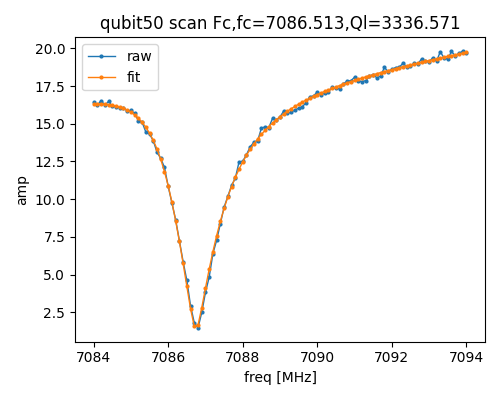

<IPython.core.display.Javascript object>


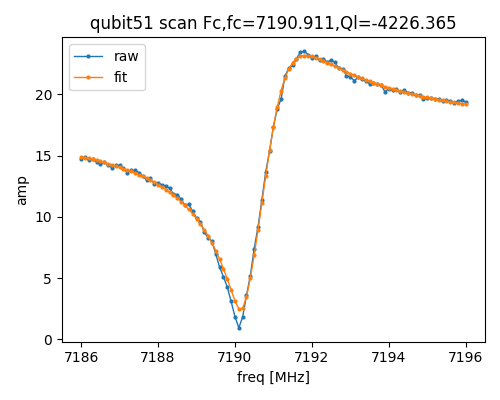

<IPython.core.display.Javascript object>


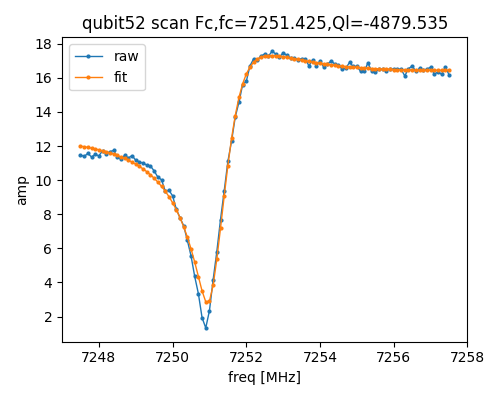

<IPython.core.display.Javascript object>


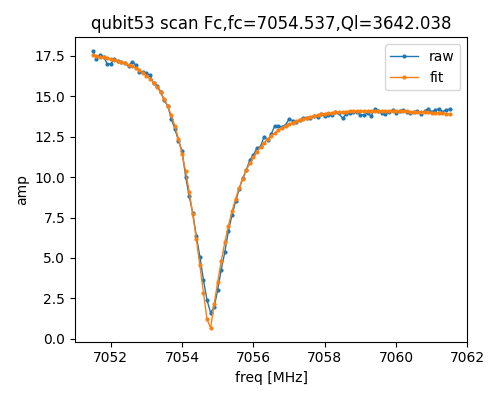

<IPython.core.display.Javascript object>


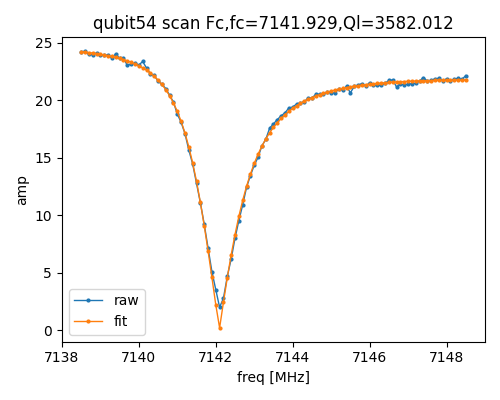

In [11]:
fc_list = np.linspace(5, -5, 101)
res = Sc.scan_fc(fc_list, path=r'E:\data\A2\20230214\221205-72bit-300pin-V8.2P1-base-4#\measureflow\Bus7and9-CavitySpectrum/')
#上面给了一个存储路径是因为measureflow生成的路径太长，不放便，暂时指定了路径，根据需要修改路径

In [ ]:
# Sc._sz_length = 200
Sc.RD.ADDA.ProbePower = -25
fc_list = np.linspace(-5, 5,101)
z_dc_list = np.linspace(-0.47,0.47,41)
Sc.scan_zdc_fc(z_dc_list, fc_list, Plot1D=True, dynamicPlot=False,path=r'E:\data\A2\20230214\221205-72bit-300pin-V8.2P1-base-4#\measureflow\q58-q59-q60-Cavity\202304052255/')